TX03 Project Team ApplePy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

DARK MODE ACTIVATION

In [2]:
plt.style.use('dark_background')  #  DARK MODE VISUALIZATION

Load StarWars file

In [3]:
data = pd.read_csv('StarWars.csv', encoding='latin')

In [4]:
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
len(data)

1187

In [7]:
data.shape

(1187, 38)

In [8]:
datana = data.dropna()
len(datana)

132

Get the columns we need and Rename them

In [9]:

datafilms = data[['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6','Unnamed: 7', 'Unnamed: 8',]]
datafilms.columns = ['I', 'II', 'III', 'IV', 'V', 'VI']
datafilms.head()

,I,II,III,IV,V,VI
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [10]:
datafilms.shape[0]

1187

Check for nulls

In [11]:
datafilms.notnull().sum()

I      674
II     572
III    551
IV     608
V      759
VI     739
dtype: int64

There are many nullss, but a concat will ignore them and we get all films in one column

In [12]:

dfallmovies = pd.concat([datafilms['I'], datafilms['II'], datafilms['III'], datafilms['IV'], datafilms['V'], datafilms['VI']])
dfplot = pd.DataFrame(dfallmovies,columns=['Movies'])
dfplot

,Movies
0,Star Wars: Episode I The Phantom Menace
1,Star Wars: Episode I The Phantom Menace
2,NaN
3,Star Wars: Episode I The Phantom Menace
4,Star Wars: Episode I The Phantom Menace
...,...
1182,Star Wars: Episode VI Return of the Jedi
1183,Star Wars: Episode VI Return of the Jedi
1184,NaN
1185,Star Wars: Episode VI Return of the Jedi


In [13]:
star6 = dfplot.dropna()

In [14]:
total_movies = dfplot.groupby(['Movies']).size()
total_movies

Movies
Star Wars: Episode I  The Phantom Menace        674
Star Wars: Episode II  Attack of the Clones     572
Star Wars: Episode III  Revenge of the Sith     551
Star Wars: Episode IV  A New Hope               608
Star Wars: Episode V The Empire Strikes Back    759
Star Wars: Episode VI Return of the Jedi        739
dtype: int64

In [15]:
total_movies.to_csv('C:/users/nirvana/sparky/pythony/out.csv')

Star Wars Episode V seems to be the most popular with 759 mentions

Visualization of this count

<AxesSubplot:xlabel='count', ylabel='Movies'>

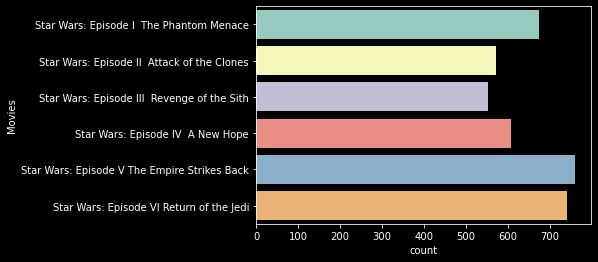

In [16]:

sb.countplot(y='Movies', data = dfplot, orient = 'v')


In [17]:
star6.to_csv('StarWars6.csv', columns=['Movies'], index=False)

Second Dataset

Get dataset

In [18]:
data2 = pd.read_csv('top 1000 movies.csv', encoding='latin')
data2

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,16-Dec-15,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,24-Apr-19,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,16-Dec-09,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,25-Jun-04,81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
914,914,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,21-Dec-01,80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),13-Aug-10,80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,17-Oct-03,80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


In [19]:
print(type(data2))

<class 'pandas.core.frame.DataFrame'>


In [20]:
len(data2)

918

In [21]:
data2.shape

(918, 11)

In [22]:
datana2 = data2.dropna()
len(datana2)

744

In [23]:
data2.corr().abs()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
Unnamed: 0,1.000000,0.799542,0.640387,0.725845
Domestic Sales (in $),0.799542,1.000000,0.797462,0.904564
International Sales (in $),0.640387,0.797462,1.000000,0.976998
World Sales (in $),0.725845,0.904564,0.976998,1.000000


Get rows that have our movies

In [24]:
starwars = data2[data2['Title'].str.contains('Star Wars')]
starwars

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,16-Dec-15,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
9,9,Star Wars: Episode VIII - The Last Jedi (2017),The Star Wars saga continues as new heroes and...,Walt Disney Studios Motion Pictures,13-Dec-17,620181382,712517448,1332698830,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 32 min,PG-13
13,13,Rogue One: A Star Wars Story (2016),"In a time of conflict, a group of unlikely her...",Walt Disney Studios Motion Pictures,14-Dec-16,532177324,523880396,1056057720,"['Action', 'Adventure', 'Sci-Fi']",2 hr 13 min,PG-13
14,14,Star Wars: Episode IX - The Rise of Skywalker ...,In the riveting conclusion of the landmark Sky...,Walt Disney Studios Motion Pictures,18-Dec-19,515202542,558946737,1074149279,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 21 min,PG-13
18,18,Star Wars: Episode I - The Phantom Menace (1999),Two Jedi escape a hostile blockade to find all...,Twentieth Century Fox,19-May-99,474544677,552538030,1027082707,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 16 min,PG
19,19,Star Wars: Episode IV - A New Hope (1977),Luke Skywalker joins forces with a Jedi Knight...,Twentieth Century Fox,25-May-77,460998507,195751992,775398007,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 1 min,PG
44,44,Star Wars: Episode III - Revenge of the Sith (...,"Three years into the Clone Wars, the Jedi resc...",Twentieth Century Fox,18-May-05,380270577,488119983,868390560,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 20 min,PG-13
81,81,Star Wars: Episode II - Attack of the Clones (...,"Ten years after initially meeting, Anakin Skyw...",Twentieth Century Fox,16-May-02,310676740,343103230,653779970,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 22 min,PG
83,83,Star Wars: Episode VI - Return of the Jedi (1983),After a daring mission to rescue Han Solo from...,Twentieth Century Fox,25-May-83,309306177,122009457,475106177,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 11 min,PG
94,94,Star Wars: Episode V - The Empire Strikes Back...,After the Rebels are brutally overpowered by t...,Twentieth Century Fox,21-May-80,292753960,190685234,538375067,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 4 min,PG


In [25]:
print(starwars.columns.values)

['Unnamed: 0' 'Title' 'Movie Info' 'Distributor' 'Release Date'
 'Domestic Sales (in $)' 'International Sales (in $)' 'World Sales (in $)'
 'Genre' 'Movie Runtime' 'License']


Let's get only the 6 movies we need

In [26]:
star6 = starwars[4:10]
star6.sort_values("Domestic Sales (in $)")
star6

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
18,18,Star Wars: Episode I - The Phantom Menace (1999),Two Jedi escape a hostile blockade to find all...,Twentieth Century Fox,19-May-99,474544677,552538030,1027082707,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 16 min,PG
19,19,Star Wars: Episode IV - A New Hope (1977),Luke Skywalker joins forces with a Jedi Knight...,Twentieth Century Fox,25-May-77,460998507,195751992,775398007,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 1 min,PG
44,44,Star Wars: Episode III - Revenge of the Sith (...,"Three years into the Clone Wars, the Jedi resc...",Twentieth Century Fox,18-May-05,380270577,488119983,868390560,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 20 min,PG-13
81,81,Star Wars: Episode II - Attack of the Clones (...,"Ten years after initially meeting, Anakin Skyw...",Twentieth Century Fox,16-May-02,310676740,343103230,653779970,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 22 min,PG
83,83,Star Wars: Episode VI - Return of the Jedi (1983),After a daring mission to rescue Han Solo from...,Twentieth Century Fox,25-May-83,309306177,122009457,475106177,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 11 min,PG
94,94,Star Wars: Episode V - The Empire Strikes Back...,After the Rebels are brutally overpowered by t...,Twentieth Century Fox,21-May-80,292753960,190685234,538375067,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 4 min,PG


Select the rows we need that are Title and only Domestic Sales since the survey in datset one was made in the USA

In [27]:
starplot = star6[['Title', 'Domestic Sales (in $)']]
starplot

,Title,Domestic Sales (in $)
18,Star Wars: Episode I - The Phantom Menace (1999),474544677
19,Star Wars: Episode IV - A New Hope (1977),460998507
44,Star Wars: Episode III - Revenge of the Sith (...,380270577
81,Star Wars: Episode II - Attack of the Clones (...,310676740
83,Star Wars: Episode VI - Return of the Jedi (1983),309306177
94,Star Wars: Episode V - The Empire Strikes Back...,292753960


Here the number one movie is Episode One, while episode Five is the last one.

Now let's plot

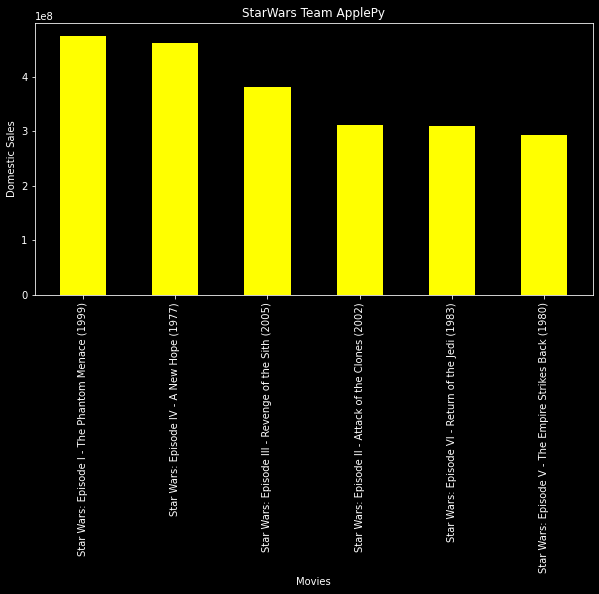

In [29]:
courses = starplot['Title']
values = starplot['Domestic Sales (in $)']
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='yellow',
        width = 0.5)
plt.xticks(rotation='vertical')
plt.xlabel("Movies")
plt.ylabel("Domestic Sales")
plt.title("StarWars Team ApplePy")
plt.show()